In [79]:
from matplotlib import pyplot as plt
from skimage import data
import numpy as np

In [80]:
def hessonberg(A):
    r=A
    h=np.eye(r.shape[0],dtype=np.float64)      #初始化
    for i in range(r.shape[0]-2):
        #print(r[i+1:r.shape[1],i])
        u=r[i+1:r.shape[1],i].reshape(r.shape[1]-1-i,1)   #取出列向量
        #print("u",u)
        sign=sum(np.sign(u[0]))             #符号函数,保证稳定性
        v=np.zeros_like(u,dtype=np.float)    #正交变换后矩阵           
        v[0]=-sign*np.linalg.norm(u)           #确定生成变量的值
        #print("v",v)
        w=(u-v)/np.linalg.norm(u-v)            #household变换中w
        hi=(np.eye(r.shape[0]-i-1,dtype='int64'))-2*np.dot(w,w.T)   #household正交矩阵
        hj=np.eye(A.shape[0],dtype=np.float)                   #正交矩阵
        hj[i+1:,i+1:]=hi
        #print("hj",hj)
        h=np.dot(hj,h)               #一系列正交矩阵
        #print(h)
        r=hj.dot(r)               #转化后矩阵
        r=np.dot(r,hj)
        #print("r",r)
    return r

In [81]:
def householdqr(A):
    r=A
    h=np.eye(r.shape[0],dtype=np.float)      #初始化
    for i in range(r.shape[0]-1):
        u=r[i:r.shape[1],i].reshape(r.shape[1]-i,1)   #取出列向量
        #print(u)
        sign=sum(np.sign(u[0]))             #符号函数,保证稳定性
        v=np.zeros_like(u,dtype=np.float)    #正交变换后矩阵           
        v[0]=-sign*np.linalg.norm(u)           #确定生成变量的值
        #print("v",v)
        w=(u-v)/np.linalg.norm(u-v)            #household变换中w
        hi=(np.eye(r.shape[0]-i,dtype='int64'))-2*np.dot(w,w.T)   #household正交矩阵
        hj=np.eye(A.shape[0],dtype=np.float)                   #正交矩阵
        hj[i:,i:]=hi
        #print("hj",hj)
        h=np.dot(hj,h)               #一系列正交矩阵
        r=hj.dot(r)
        #print("r",r)
    return h.T,r            #返回Q，R


In [82]:
def myqr(A):
    Q_=np.eye(A.shape[0])
    A1=np.array(A,dtype=np.float64)
    for i in range(100):
        Q,R=householdqr(A1)
        A1=np.dot(R,Q)
        Q_=np.dot(Q,Q_)
        if (np.abs(A1.sum()-A.sum()))<1e-6:  #控制迭代次数
            break
    return A1,Q_

In [83]:
def mysvd(A):
    lam,u=myqr(np.dot(A,A.T))
    lam,v=myqr(np.dot(A.T,A))
    #return np.dot(u,lam**0.5).dot(v.T)
    lam=lam**0.5
    a=np.diag(lam)                    #取出特征值,对角线  ,
    b=np.diag(a)    #转化类型
    sigma=np.zeros_like(A)
    sigma[:t,:t]=b[:t,:t]
    """
    a=a.tolist()
    b=list(a)
    b.sort(key=abs,reverse=True)     #特征值按照绝对值大小排序
    sigma=np.zeros_like(lam)
    for i in range(10):
        x=b[i]
        t=a.index(x)             #原位置
        sigma[t,t]=x 
    sigma=pow(sigma-sigma.min(),0.5)
    """
    return a,np.dot(u*sigma,(v.T))

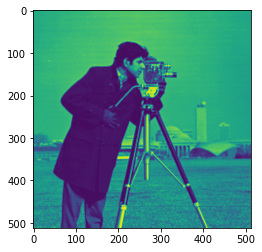

KeyboardInterrupt: 

In [84]:
image=data.camera()
A=np.array(image,dtype=np.float64)
#A=np.array([[5,-3,2],[6,-4,4],[4,-4,5]])
#A=np.array([[34,-12,12,15],[-12,62,16,-7],[12,16,25,-15],[15,-7,-15,50]],dtype=np.float64)
#A=hessonberg(A)
#x=mysvd(A)
#print(x)
plt.imshow(A)
plt.show()
#x=hessonberg(A.dot(A.T))
#householdqr(x)
#a,b=householdqr(A)
a,AK=mysvd(A)
plt.imshow(Ak)
plt.show()

In [7]:
U,sigma,VT=np.linalg.svd(A)
print(a-sigma)


3
